# Odysseus paper charts

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

plt.style.use("plot_styles.mplstyle")

# import seaborn as sns

## Figure 1

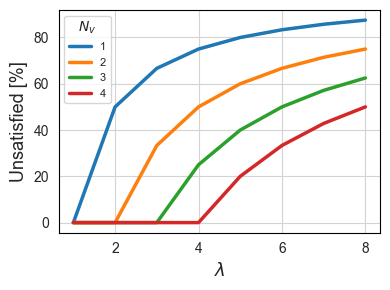

In [2]:
df = pd.read_csv("paper_figures_data/dummy_case_studies/scenario_A_data.csv")
fig, ax = plt.subplots()
df.set_index("lambda").sort_index().groupby("n_vehicles_sim").percentage_unsatisfied.plot()
ax.set_xlabel(r"$\lambda$")
ax.set_ylabel(r"Unsatisfied [%]")
plt.legend(title=r"$N_{v}$")
plt.tight_layout()
plt.savefig("paper_figures/figure_1.pdf")
plt.show()
plt.close()

## Figure 2

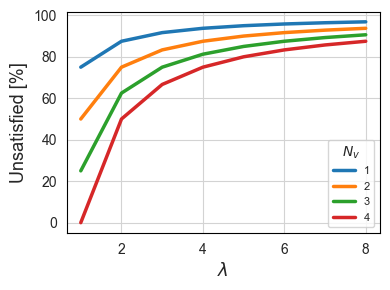

In [3]:
df = pd.read_csv("paper_figures_data/dummy_case_studies/scenario_B_data.csv")
fig, ax = plt.subplots()
df.set_index("lambda").sort_index().groupby("n_vehicles_sim").percentage_unsatisfied.plot()
ax.set_xlabel(r"$\lambda$")
ax.set_ylabel(r"Unsatisfied [%]")
plt.legend(title=r"$N_{v}$")
plt.tight_layout()
plt.savefig("paper_figures/figure_2.pdf")
plt.show()
plt.close()

## Figure 3

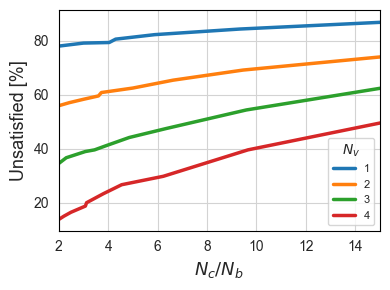

In [4]:
df = pd.read_csv("paper_figures_data/dummy_case_studies/scenario_B1_data_fig3.csv")
fig, ax = plt.subplots()
df.set_index("n_charges_per_100_bookings").sort_index().groupby("n_vehicles_sim").percentage_unsatisfied.plot()
ax.set_xlabel(r"$N_{c}/N_{b}$")
ax.set_ylabel(r"Unsatisfied [%]")
plt.legend(title=r"$N_{v}$")
ax.set_xlim(2, 15)
plt.tight_layout()
plt.savefig("paper_figures/figure_3.pdf")
plt.show()
plt.close()

## Figure 4
### Number of simulated booking requests per second

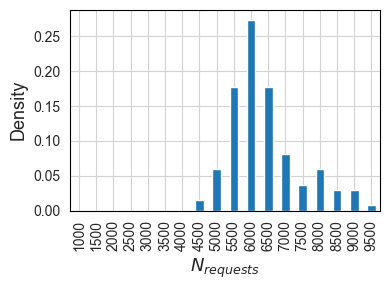

In [5]:
df = pd.read_csv("odysseus/simulator/results/Torino/multiple_runs/scenario_C/sim_stats.csv")
df["n_booking_reqs_per_sec"] = df.n_booking_reqs / df.sim_exec_time_sec
df_value_counts = df["n_booking_reqs_per_sec"].value_counts(
    normalize=True, bins=[round(int(b)) for b in list(range(1000, 10000, 500))]
).sort_index()
df_value_counts = pd.DataFrame(
    df_value_counts, index=[round(int(b)) for b in list(range(1000, 10000, 500))]
)
fig, ax = plt.subplots()
df_value_counts.sort_index().plot.bar(ax=ax)
plt.xlabel(r"$N_{requests}$")
plt.ylabel(r"Density")
ax.get_legend().remove()
plt.tight_layout()
plt.savefig("paper_figures/figure_4.pdf")
plt.show()
plt.close()

## Figure 5
### Number of simulated bookings (charging included) per second


In [6]:
df["n_bookings_per_sec"] = df.n_bookings / df.sim_exec_time_sec
df_value_counts = df["n_bookings_per_sec"].value_counts(
    normalize=True,
    bins=[round(int(b)) for b in list(range(1000, 10000, 500))]
).sort_index()
df_value_counts = pd.DataFrame(
    df_value_counts,
    index=[round(int(b)) for b in list(range(1000, 10000, 500))]
)

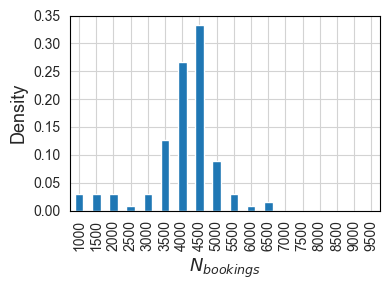

In [7]:
fig, ax = plt.subplots()
df_value_counts.sort_index().plot.bar(ax=ax)
plt.tight_layout()
plt.savefig("paper_figures/figure_5.pdf")
plt.xlabel(r"$N_{bookings}$")
plt.ylabel(r"Density")
ax.get_legend().remove()
plt.tight_layout()
plt.savefig("paper_figures/figure_5.pdf")
plt.show()
plt.close()

## Figure 6
### Percentage of unsatisfied requests w.r.t. number of charging poles with different number of charging zones


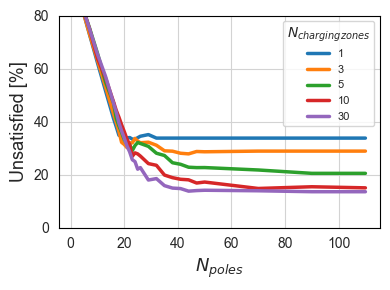

In [8]:
df = pd.read_csv("odysseus/simulator/results/Torino/multiple_runs/scenario_C/sim_stats.csv")[[
    "n_charging_zones", "tot_n_charging_poles", "percentage_unsatisfied",
    "charging_return_strategy",
    "charging_relocation_strategy"
]]
fig, ax = plt.subplots()
df[
    (df.charging_return_strategy == "no_return") & (
        df.charging_relocation_strategy == "closest_free"
    )
].set_index("tot_n_charging_poles").sort_index().groupby("n_charging_zones").percentage_unsatisfied.plot()
ax.set_xlabel(r"$N_{poles}$")
ax.set_ylabel(r"Unsatisfied [%]")
plt.legend(title=r"$N_{charging zones}$")
#ax.set_xlim(0, 30)
ax.set_ylim(0, 80)
plt.tight_layout()
plt.savefig("paper_figures/figure_6.pdf")
plt.show()
plt.close()

## Figure 7
### Number of total and unsatisfied requests in a typical week within the simulation


In [9]:
#fig, ax = plt.subplots()
#(df.set_index("start_time").resample("30Min").n_vehicles_booked.mean().iloc[-350*6:-350*6+350]).plot()
#ax.set_xlabel(r"$t$")
#ax.set_ylabel(r"N booked vehicles")
#plt.legend(title=r"$N_{v}$")
#ax.set_xlim(2, 15)

In [10]:
#df.set_index("start_time").resample("30Min").count().iloc[:, 0].iloc[-350:].plot()

In [11]:
import calendar
def get_weekday_string_from_int(i):
    return list(calendar.day_abbr)[i]


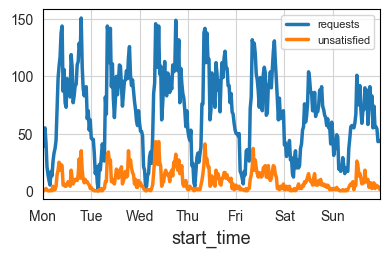

In [12]:
df = pd.read_csv(
    "odysseus/simulator/results/Torino/single_run/scenario_C/0_0_0/sim_booking_requests.csv"
)[[
    "start_time", "n_vehicles_booked"
]]
df.start_time = pd.to_datetime(df.start_time)
n_reqs_resampled = df.set_index("start_time").resample("30Min").count().iloc[:, 0].loc[
       "2017-11-20": "2017-11-26"
]
df = pd.read_csv(
    "odysseus/simulator/results/Torino/single_run/scenario_C/0_0_0/sim_unsatisfied_requests.csv"
)
df.start_time = pd.to_datetime(df.start_time)
n_unsatisfied_resampled = df.set_index("start_time").resample("30Min").count().iloc[:, 0].loc[
      "2017-11-20": "2017-11-26"
]
n_reqs_resampled.plot(label="requests")
n_unsatisfied_resampled.plot(label="unsatisfied")
plt.legend()
plt.tight_layout()
plt.xticks(
    pd.Series(n_reqs_resampled.index.values).dt.date.unique(),
    [get_weekday_string_from_int(i) for i in range(7)]
)
plt.savefig("paper_figures/figure_7.pdf")
plt.show()
plt.close()

## Figure 8
### Total number of unsatisfied requests, heatmap normalised w.r.t. max unsatisfied requests in a zone
#### Max zone count = 1, every other zone count between 0 and 1

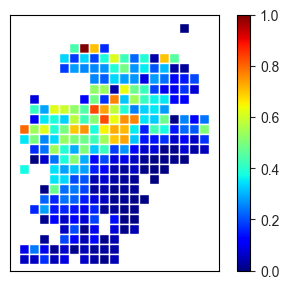

In [13]:
df = pd.read_csv("odysseus/simulator/results/Torino/single_run/scenario_C/0_0_0/sim_booking_requests.csv")
avg_origins_by_zone = df.groupby(
    ["origin_id", "hour"], as_index=False
).count().iloc[:, :3].groupby("origin_id")["Unnamed: 0"].mean()
grid = gpd.read_file("odysseus/simulator/results/Torino/single_run/scenario_C/0_0_0/grid.dbf")
grid.unsatisfie = (grid.unsatisfie / grid.unsatisfie.max())
grid.loc[533, "unsatisfie"] = 0
grid[grid.unsatisfie >= 0].plot(
    column="unsatisfie", legend=True, cmap="jet",
    legend_kwds={'ticks': [0, 0.2, 0.4, 0.6, 0.8, 1]}
)
plt.xticks([])
plt.yticks([])
plt.ylim(45.01, 45.125)
plt.tight_layout()
plt.savefig("paper_figures/figure_8.pdf")
plt.show()
plt.close()

## Figure 9
### Average number of available vehicles, heatmap normalised w.r.t. max unsatisfied requests in a zone
#### Max zone count = 1, every other zone count between 0 and 1

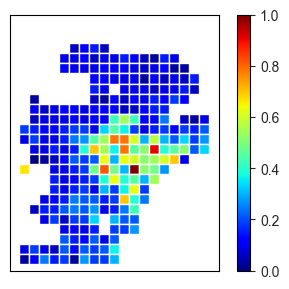

In [14]:
df = pd.read_csv("odysseus/simulator/results/Torino/single_run/scenario_C/0_0_0/zones_history.csv")
df["hour"] = pd.to_datetime(df.t).dt.hour
avg_n_vehicles_by_zone = df.groupby(
    ["zone_id"], as_index=False
).vehicles_parked.max().vehicles_parked
grid["avg_n_vehicles_by_zone"] = avg_n_vehicles_by_zone.replace({0: np.NAN})
grid.loc[533, "avg_n_vehicles_by_zone"] = 0
grid.avg_n_vehicles_by_zone = (grid.avg_n_vehicles_by_zone / grid.avg_n_vehicles_by_zone.max())
grid.plot(
    column="avg_n_vehicles_by_zone", legend=True, cmap="jet",
    # legend_kwds={'ticks': [0, 0.2, 0.4, 0.6, 0.8, 1]}
)
plt.xticks([])
plt.yticks([])
plt.ylim(45.01, 45.125)
plt.tight_layout()
plt.savefig("paper_figures/figure_9.pdf")
plt.show()
plt.close()

## E-Scooters

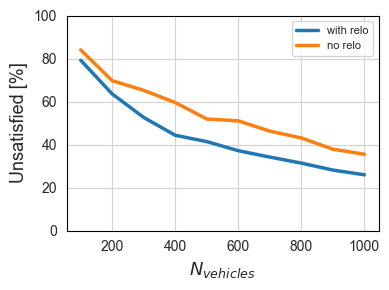

In [15]:
df = pd.read_csv("odysseus/simulator/results/Louisville/multiple_runs/scenario_D/sim_stats.csv")[[
    "n_vehicles_sim", "relocation", "percentage_unsatisfied",
]]
fig, ax = plt.subplots()
df[df.relocation].set_index("n_vehicles_sim").sort_index().percentage_unsatisfied.plot(label="with relo")
df[~df.relocation].set_index("n_vehicles_sim").sort_index().percentage_unsatisfied.plot(label="no relo")
ax.set_xlabel(r"$N_{vehicles}$")
ax.set_ylabel(r"Unsatisfied [%]")
#ax.set_xlim(0, 30)
ax.set_ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.savefig("paper_figures/figure_X.pdf")
plt.show()
plt.close()

31966
21353
22733


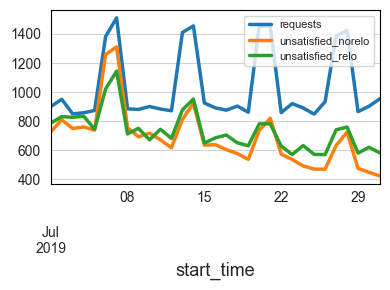

In [16]:
df = pd.read_csv(
    "odysseus/simulator/results/Louisville/single_run/scenario_D/0_0_0/sim_booking_requests.csv"
)[[
    "start_time", "n_vehicles_booked"
]]
df.start_time = pd.to_datetime(df.start_time)
n_reqs_resampled = df.set_index("start_time").resample("1D").count().iloc[:, 0].loc[
       "2019-7-1": "2019-7-31"
]
print(n_reqs_resampled.sum())
df = pd.read_csv(
    "odysseus/simulator/results/Louisville/single_run/scenario_D/0_0_0/sim_bookings.csv"
)
df.start_time = pd.to_datetime(df.start_time)
n_unsatisfied_resampled = df.set_index("start_time").resample("1D").count().iloc[:, 0].loc[
       "2019-7-1": "2019-7-31"
]
print(n_unsatisfied_resampled.sum())

df = pd.read_csv(
    "odysseus/simulator/results/Louisville/single_run/scenario_D/0_0_1/sim_bookings.csv"
)
df.start_time = pd.to_datetime(df.start_time)
n_unsatisfied_resampled_relo = df.set_index("start_time").resample("1D").count().iloc[:, 0].loc[
       "2019-7-1": "2019-7-31"
]
print(n_unsatisfied_resampled_relo.sum())

n_reqs_resampled.plot(label="requests")
n_unsatisfied_resampled.plot(label="unsatisfied_norelo")
n_unsatisfied_resampled_relo.plot(label="unsatisfied_relo")
plt.legend()
plt.tight_layout()
#plt.xticks(
#    pd.Series(n_reqs_resampled.index.values).dt.date.unique(),
#    [get_weekday_string_from_int(i) for i in range(7)]
#)
plt.savefig("paper_figures/figure_XXX.pdf")
plt.show()
plt.close()

In [17]:
df = pd.read_csv(
    "odysseus/simulator/results/Louisville/single_run/scenario_D/0_0_0/relocation_history.csv"
)

In [18]:
df

,Unnamed: 0,start_time,end_time,date,hour,day_hour,n_vehicles,vehicle_ids,start_zone_ids,end_zone_ids,distance,duration,worker
0,0,2019-07-01 02:04:41.926511+00:00,2019-07-01 04:09:23.853022+00:00,2019-07-01,2,2019-07-01 02:00:00+00:00,24,"[31, 57, 69, 70, 106, 109, 111, 118, 128, 149,...",[302],"[138, 676, 604, 425, 958, 878, 343, 956, 919, ...",41566.258392,7481.926511,0
1,1,2019-07-01 05:11:36.339362+00:00,2019-07-01 07:20:57.580724+00:00,2019-07-01,5,2019-07-01 05:00:00+00:00,22,"[2, 18, 46, 65, 196, 203, 223, 241, 280, 286, ...",[218],"[421, 306, 800, 954, 1040, 303, 873, 794, 788,...",43118.007566,7761.241362,0
2,2,2019-07-01 08:07:53.021206+00:00,2019-07-01 10:10:01.409889+00:00,2019-07-01,8,2019-07-01 08:00:00+00:00,22,"[6, 24, 43, 117, 147, 156, 184, 208, 239, 255,...",[340],"[137, 212, 349, 226, 829, 926, 587, 588, 711, ...",40713.270461,7328.388683,0
3,3,2019-07-01 11:35:31.224769+00:00,2019-07-01 14:09:14.350352+00:00,2019-07-01,11,2019-07-01 11:00:00+00:00,20,"[1, 28, 81, 108, 112, 119, 129, 138, 155, 158,...",[262],"[340, 624, 384, 429, 1079, 511, 592, 551, 892,...",51239.586570,9223.125583,0
4,4,2019-07-01 14:33:14.006217+00:00,2019-07-01 17:06:14.758509+00:00,2019-07-01,14,2019-07-01 14:00:00+00:00,21,"[53, 72, 101, 124, 143, 180, 197, 224, 244, 27...",[259],"[340, 20, 351, 705, 459, 1035, 591, 499, 674, ...",51004.179402,9180.752292,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,242,2019-07-30 10:40:52.127733+00:00,2019-07-30 13:21:35.378579+00:00,2019-07-30,10,2019-07-30 10:00:00+00:00,4,"[83, 423, 0, 385]",[642],"[725, 476, 937, 1035, 799, 721, 846, 941, 942,...",53573.615813,9643.250846,0
243,243,2019-07-30 13:16:24.701956+00:00,2019-07-30 15:31:35.837758+00:00,2019-07-30,13,2019-07-30 13:00:00+00:00,3,"[221, 85, 198]",[1088],"[1127, 1209, 1126, 1207, 1275, 1235, 1360, 837...",45061.865569,8111.135802,0
244,244,2019-07-30 17:42:30.655565+00:00,2019-07-30 21:24:43.460004+00:00,2019-07-30,17,2019-07-30 17:00:00+00:00,4,"[224, 277, 479, 216]",[184],"[181, 146, 220, 1413, 775, 1125, 1213, 1035, 6...",74071.135774,13332.804439,0
245,245,2019-07-30 20:01:07.473794+00:00,2019-07-30 22:01:27.589195+00:00,2019-07-30,20,2019-07-30 20:00:00+00:00,3,"[242, 167, 343]",[637],"[967, 352, 596, 597, 283, 651, 808, 849, 773, ...",40111.752227,7220.115401,0


<AxesSubplot: >

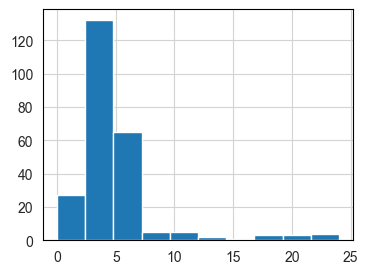

In [19]:
df.n_vehicles.hist()

In [20]:
from ast import literal_eval
df.start_zone_ids = df.start_zone_ids.apply(lambda x: literal_eval(x))
df = df.explode(["start_zone_ids"])

In [21]:
df

,Unnamed: 0,start_time,end_time,date,hour,day_hour,n_vehicles,vehicle_ids,start_zone_ids,end_zone_ids,distance,duration,worker
0,0,2019-07-01 02:04:41.926511+00:00,2019-07-01 04:09:23.853022+00:00,2019-07-01,2,2019-07-01 02:00:00+00:00,24,"[31, 57, 69, 70, 106, 109, 111, 118, 128, 149,...",302,"[138, 676, 604, 425, 958, 878, 343, 956, 919, ...",41566.258392,7481.926511,0
1,1,2019-07-01 05:11:36.339362+00:00,2019-07-01 07:20:57.580724+00:00,2019-07-01,5,2019-07-01 05:00:00+00:00,22,"[2, 18, 46, 65, 196, 203, 223, 241, 280, 286, ...",218,"[421, 306, 800, 954, 1040, 303, 873, 794, 788,...",43118.007566,7761.241362,0
2,2,2019-07-01 08:07:53.021206+00:00,2019-07-01 10:10:01.409889+00:00,2019-07-01,8,2019-07-01 08:00:00+00:00,22,"[6, 24, 43, 117, 147, 156, 184, 208, 239, 255,...",340,"[137, 212, 349, 226, 829, 926, 587, 588, 711, ...",40713.270461,7328.388683,0
3,3,2019-07-01 11:35:31.224769+00:00,2019-07-01 14:09:14.350352+00:00,2019-07-01,11,2019-07-01 11:00:00+00:00,20,"[1, 28, 81, 108, 112, 119, 129, 138, 155, 158,...",262,"[340, 624, 384, 429, 1079, 511, 592, 551, 892,...",51239.586570,9223.125583,0
4,4,2019-07-01 14:33:14.006217+00:00,2019-07-01 17:06:14.758509+00:00,2019-07-01,14,2019-07-01 14:00:00+00:00,21,"[53, 72, 101, 124, 143, 180, 197, 224, 244, 27...",259,"[340, 20, 351, 705, 459, 1035, 591, 499, 674, ...",51004.179402,9180.752292,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,242,2019-07-30 10:40:52.127733+00:00,2019-07-30 13:21:35.378579+00:00,2019-07-30,10,2019-07-30 10:00:00+00:00,4,"[83, 423, 0, 385]",642,"[725, 476, 937, 1035, 799, 721, 846, 941, 942,...",53573.615813,9643.250846,0
243,243,2019-07-30 13:16:24.701956+00:00,2019-07-30 15:31:35.837758+00:00,2019-07-30,13,2019-07-30 13:00:00+00:00,3,"[221, 85, 198]",1088,"[1127, 1209, 1126, 1207, 1275, 1235, 1360, 837...",45061.865569,8111.135802,0
244,244,2019-07-30 17:42:30.655565+00:00,2019-07-30 21:24:43.460004+00:00,2019-07-30,17,2019-07-30 17:00:00+00:00,4,"[224, 277, 479, 216]",184,"[181, 146, 220, 1413, 775, 1125, 1213, 1035, 6...",74071.135774,13332.804439,0
245,245,2019-07-30 20:01:07.473794+00:00,2019-07-30 22:01:27.589195+00:00,2019-07-30,20,2019-07-30 20:00:00+00:00,3,"[242, 167, 343]",637,"[967, 352, 596, 597, 283, 651, 808, 849, 773, ...",40111.752227,7220.115401,0


In [22]:
df.start_zone_ids.value_counts()

103     14
1450     8
1324     8
1446     6
1365     6
        ..
1199     1
751      1
758      1
1405     1
637      1
Name: start_zone_ids, Length: 145, dtype: int64

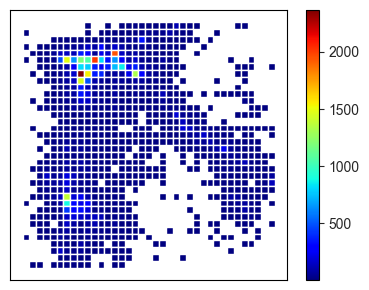

In [23]:
grid = gpd.read_file("odysseus/simulator/results/Louisville/single_run/scenario_D/0_0_0/grid.dbf")
# grid.unsatisfie = (grid.unsatisfie / grid.unsatisfie.max())
# grid.loc[533, "unsatisfie"] = 0
grid[grid.unsatisfie >= 0].plot(
    column="unsatisfie", legend=True, cmap="jet",
    #legend_kwds={'ticks': [0, 0.2, 0.4, 0.6, 0.8, 1]}
)
plt.xticks([])
plt.yticks([])
# plt.ylim(45.01, 45.125)
plt.tight_layout()
plt.savefig("paper_figures/figure_XXXX.pdf")
plt.show()
plt.close()

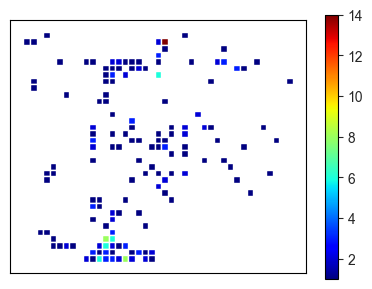

In [24]:
grid["relostart"] = df.start_zone_ids.value_counts()
# grid.relostart = (grid.relostart / grid.relostart.max())
# grid.loc[533, "unsatisfie"] = 0
grid[grid.relostart >= 0].plot(
    column="relostart", legend=True, cmap="jet",
    # legend_kwds={'ticks': [0, 0.2, 0.4, 0.6, 0.8, 1]}
)
plt.xticks([])
plt.yticks([])
# plt.ylim(45.01, 45.125)
plt.tight_layout()
plt.savefig("paper_figures/figure_XXXXX.pdf")
plt.show()
plt.close()